In [67]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import numpy as np

wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [70]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl) 

Training accuracy: 0.95
Test accuracy: 0.98


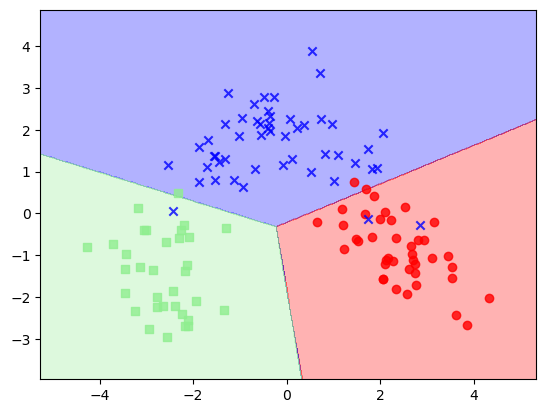

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr', random_state=1)
lr.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, lr)

print('Training accuracy: %.2f' % lr.score(X_train, y_train))
print('Test accuracy: %.2f' % lr.score(X_test, y_test))


Training accuracy: 0.98
Test accuracy: 0.94


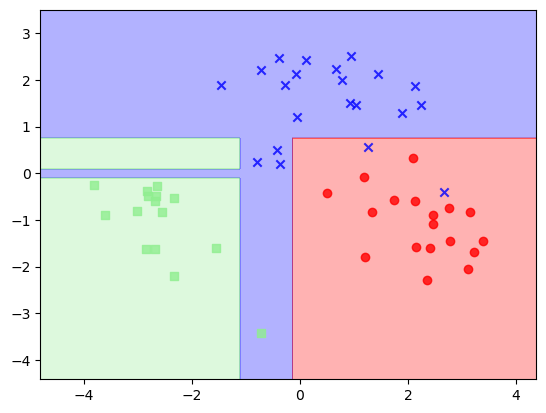

In [72]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, tree)

print('Training accuracy: %.2f' % tree.score(X_train, y_train))
print('Test accuracy: %.2f' % tree.score(X_test, y_test))


Training accuracy: 0.96
Test accuracy: 0.96


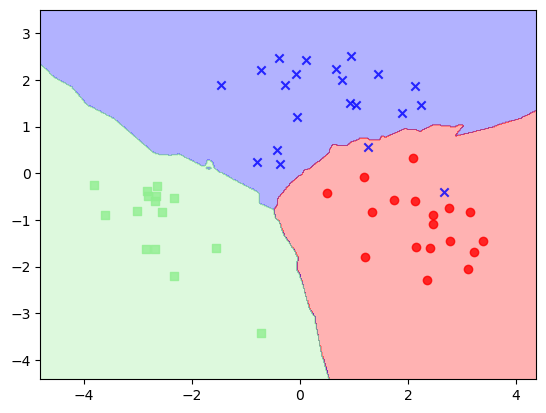

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, knn)
print('Training accuracy: %.2f' % knn.score(X_train, y_train))
print('Test accuracy: %.2f' % knn.score(X_test, y_test))

Training accuracy: 0.97
Test accuracy: 0.96


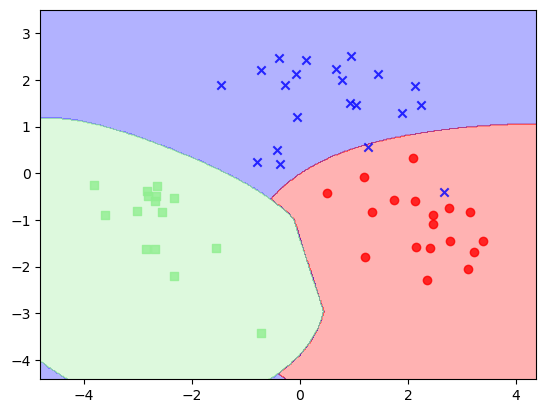

In [74]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, svm)
print('Training accuracy: %.2f' % svm.score(X_train, y_train))
print('Test accuracy: %.2f' % svm.score(X_test, y_test))


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("titanic.csv")
df_select = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked'])
df_select = df_select.dropna(axis=0)
enc = LabelEncoder()
df_select["Sex"] = enc.fit_transform(df_select['Sex'])

In [81]:
X = df_select.values[:, 1:]
y = df_select.values[:, 0]

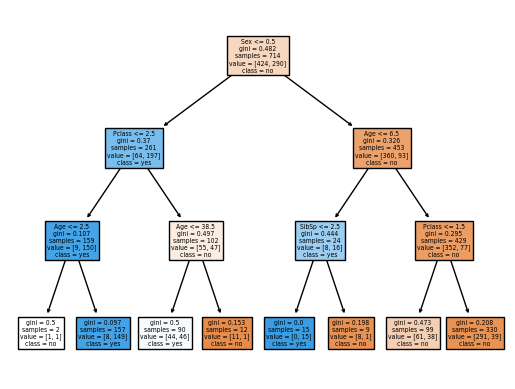

In [83]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(criterion = 'gini', max_depth=3, random_state=1)
tree.fit(X, y)

plot_tree(tree, feature_names=df_select.columns[1:], class_names=['no', 'yes'], filled=True)
plt.show()

In [78]:
import pandas as pd
import numpy as np

hd = pd.read_csv('heart_disease.csv')

# set num values to 0 and 1 (if it is > 0)
hd['num'] = np.where(hd['num'] > 0, 1, 0)

# Make X, y using all features
X = hd.values[:, :-1]
y = hd.values[:, -1].astype(np.int32)

from sklearn.model_selection import train_test_split

# train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

k = 1
Accuracy = 0
for i in range(1, 21) :
    pipe_lr = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i, p=2))
    pipe_lr.fit(X_train, y_train)
    if Accuracy < pipe_lr.score(X_test, y_test) :
        k = i
        Accuracy = pipe_lr.score(X_test, y_test)

print('Best k = %d' % k)
print('Best Test Accuracy: %.2f' % Accuracy)

Best k = 9
Best Test Accuracy: 0.87
